
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Подивитись на кореляцію між таргет змінною та іншими фічами.
2. Перевірити як куріння, індекс маси тіла, вік, кількість дітей може впливати на таргет змінну.
3. подивитись чи є залежність між таргетом та регіном чи статтю (субʼєкттивно припускаю, що не має бути сильної кореляції).
4. Подивитись чи є аутлаєри по медичним витратам та проаналізувати їх інші фічі.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
!pip install plotly matplotlib seaborn --quiet
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

## Sex vs charges

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

1. Спостерігаємо правоскошений розподіл для обох статей.
2. Бачимо що діапазон витрат для чоловіків більший, ніж у жінок.
3. Також спостерігаємо доволі багато аутлаєрів як серед жінок, так і серед чоловіків.
4. Не дивлячись на різницю у діапазоні витрат бачимо, що медіана для чоловіків та жінок майже однакова.

# Region vs charges

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey', 'yellow', 'red'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

1. Серед усіх регіонів спостерігаємо правоскошений розподіл.
2. Бачимо, що найменший діапазон витрат у southwest, а найбільший у southeast. Можна окремо проаналізувати, що саме може знаходитись у цих регіонал, можливо десь є шкідливі виробництва тощо.
3. Бачимо, що є доволі багато аутлаєрів для кожного регіону.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

# Region and smoker

In [ ]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

1. Бачимо, що загалом некурців більше. Кількість некурців у кожному регіоні майже однакова.
2. Найбільше курців бачимо у southeast. (у попередньому графіку спостерігали, що по цьому регіону був найбільший діапазон витрат).


# Children and smoker

In [ ]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker', histnorm='percent')

1. Бачимо, що у відсотковому співвідношенні найменше кірців серед людей, у кого є 5 дітей (далі йдуть люди з 4 дітьми).
2. Найбільше курців серед людей з 2 та 3 дітьми.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
fig = px.violin(
    medical_df,
    x='children',
    y='charges',
    box=True,  # Додати "ящики" в середину для додаткової інформації
    points='all',
    title='Розподіл charges залежно від кількості дітей (children)',
    color='children'
)
fig.show()

1. Бачимо що стартова сума медичних витрат збільшується зі збільшенням кількості дітей (але тут певно ще треба враховувати вік, бо скоріш за все чим більше дітей, тим більше і буде вік, а ми бачили на попередніх графіках, що витрати зростають з віком).
2. Найменіші максимальні витрати у людей з 5 та 4 дітьми (але в той же час з попередньої візуалізації серед цієї категорії було найменше курців).



**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

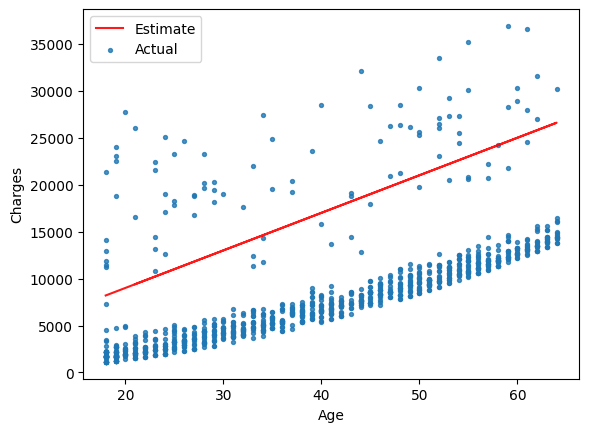

In [34]:
try_parameters(non_smoker_df, 400, 1000)

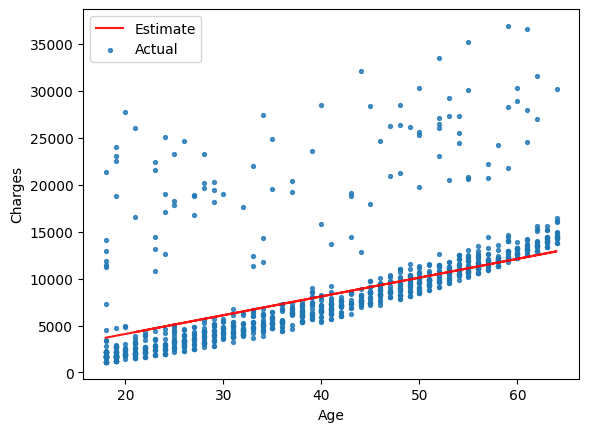

In [37]:
try_parameters(non_smoker_df, 200, 100)

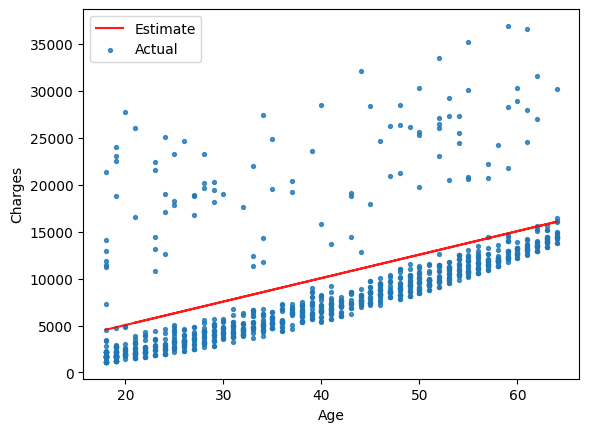

In [52]:
try_parameters(non_smoker_df, 250, 50)

1. Спробувала спочатку за допомогою параметра b змістити лінію вниз.
2. За допомогою параметра w - змінити кут нахилу лінії.
3. Спробувала максимально наблизити до даних.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [53]:
medical_df.charges.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [104]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = non_smoker_df['charges']
predicted_1 = estimate_charges(non_smoker_df.age, 400, 1000)
predicted_2 = estimate_charges(non_smoker_df.age, 200, 100)
predicted_3 = estimate_charges(non_smoker_df.age, 250, 50)

predicted_new = estimate_charges(non_smoker_df.age, 220, 50)


rmse(targets, predicted_1), rmse(targets, predicted_2), rmse(targets, predicted_3), rmse(targets, predicted_new)

(9718.601840724683, 4779.5540037235605, 4892.397594893337, 4718.052465973731)

1. Бачимо, що найкращий результат дав другий набір пкоефіцієнтів. Хоча візуально спочатку виглядало, що це не найбільш оптимальна лінія.
2. Загалом стратегія пошуку оптимальної лінії виглядає як пошук правильних коефіцієнтів, якщо дивитись на візуальну складову, то можна спочатку скорегувати кут нахилу, а потім зміщувати лінію. Якщо мова про пошук найкращого значення по формулі rmse, то можна підставляти різні значення та спостерігати динаміку зміни rmse і відштовхуючись від змін шукати ʼідейльнийʼ коефіцієнт.